Binary &
Multi-class classificaction

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
from sklearn.datasets import make_classification

In [61]:
X,Y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [62]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [64]:
X_train.shape

(700, 10)

In [65]:
#model training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [66]:
logistic.fit(X_train,Y_train)

LogisticRegression()

In [67]:
Y_pred=logistic.predict(X_test)
print(Y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Hyperparameter Tuning and Cross validation


In [70]:
model=LogisticRegression()
penalty=['11','12','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [71]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [72]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [73]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [74]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['11', '12', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [75]:
grid.fit(X_train,Y_train)

ValueError: 
All the 375 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got '11' instead.

--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '11' instead.

--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'l1', 'elasticnet'} or None. Got '11' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got '11' instead.

--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got '11' instead.

--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '12' instead.

--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got '12' instead.

--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'l1', 'elasticnet'} or None. Got '12' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got '12' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got '12' instead.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 75, in _check_solver
    raise ValueError(
        f"Only 'saga' solver supports elasticnet penalty, got solver={solver}."
    )
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.


In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid.best_score_

NameError: name 'grid' is not defined

In [ ]:
Y_pred=grid.predict(X_test)

NameError: name 'grid' is not defined

In [ ]:
score=accuracy_score(Y_pred,Y_test)
print(score)
print(classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

NameError: name 'accuracy_score' is not defined

Randomized SearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [ ]:
randomcv.fit(X_train,Y_train)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '11' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 75, in _check_solver
    raise ValueError(
        f"Only 'saga' solver supports elasticnet penalty, got solver={solver}."
    )
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '12' instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.


Logistic Regression for Multiclass problem

In [ ]:
X,Y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=42)

In [ ]:
X

array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
         1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
         1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
        -1.45103394,  1.32543211],
       ...,
       [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
        -1.83932326, -0.03120349],
       [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
         2.85446468,  1.3094441 ],
       [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
        -1.43989584,  0.04749347]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)

C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
Y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [ ]:
score=accuracy_score(Y_pred,Y_test)
print(score)
print(classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

0.68
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300

[[79 31  3]
 [16 38 11]
 [ 8 27 87]]


Logistic Regression for Imbalanced Dataset

In [ ]:
#generate and plot synthetic imbalanced class
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
#imbalanced dataset
X,Y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [ ]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]])

In [ ]:
Counter(Y)

Counter({np.int64(0): 985, np.int64(1): 15})

In [ ]:
import seaborn as sns
import pandas as pd
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=Y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['11','12','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [ ]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [ ]:
params

{'penalty': ['11', '12', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [ ]:
grid.fit(X_train,Y_train)

ValueError: 
All the 6000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got '11' instead.

--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        self._parameter_constraints,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        self.get_params(deep=False),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        caller_name=self.__class__.__name__,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
    ...<2 lines>...
    )
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got '12' instead.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 75, in _check_solver
    raise ValueError(
        f"Only 'saga' solver supports elasticnet penalty, got solver={solver}."
    )
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sai kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.


In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
score=accuracy_score(Y_pred,Y_test)
print(score)
print(classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

ValueError: Found input variables with inconsistent numbers of samples: [300, 250]

Logistic Regression with ROC curve and AUE Score

In [ ]:
#model.predict(X_test)

In [ ]:
#roc and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
#generate 2 class dataset
X,Y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#generate no skill prediction
dummy_model_prob=[0 for _ in range(len(Y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
#lets create basic logistic model
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model_prob=model.predict_proba(X_test)

In [ ]:
model_prob=model_prob[:,1]

In [ ]:
#lets calculate scores
dummy_model_auc=roc_auc_score(Y_test,dummy_model_prob)
model_auc=roc_auc_score(Y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [ ]:
#calculate roc roc_curve
dummy_fpr, dummy_tpr, _ = roc_curve(Y_test, dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(Y_test,model_prob)

In [77]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

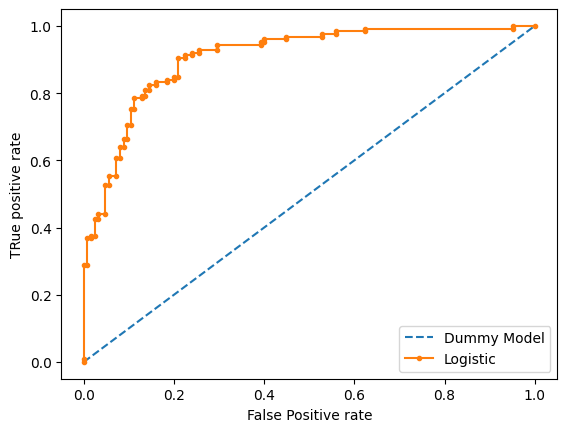

In [78]:
#plot roc curve for model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr, marker='.',label='Logistic')
#axis labels
pyplot.xlabel('False Positive rate')
pyplot.ylabel('TRue positive rate')
# show legend
pyplot.legend()
#show plot
pyplot.show()

NameError: name 'thresholds' is not defined

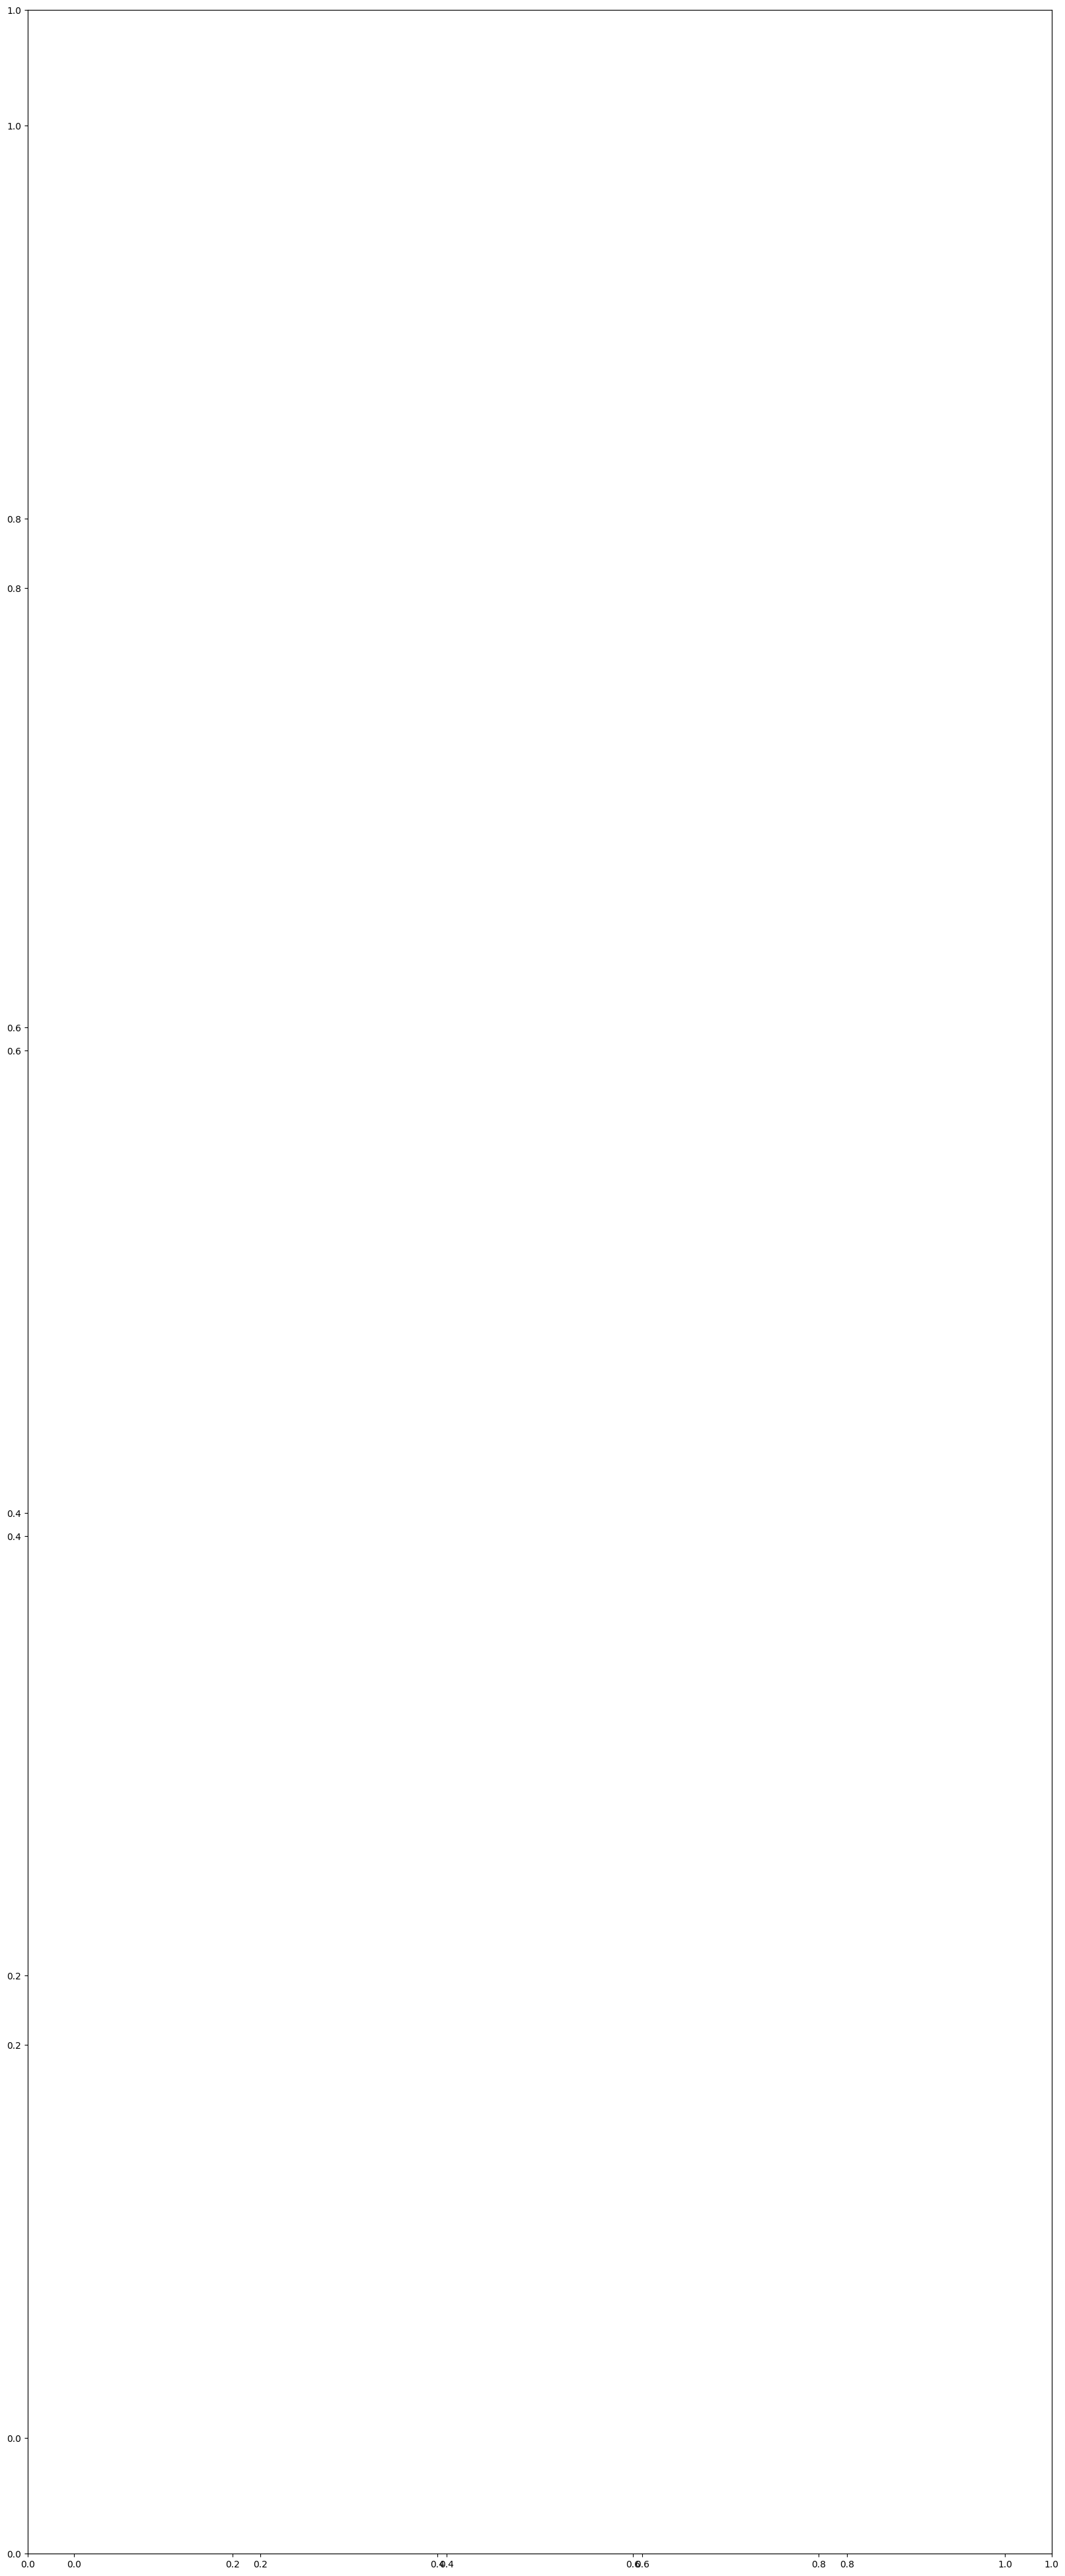

In [84]:
import numpy as np
fig=pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr, marker='.',label='Logistic')
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
pyplot.xlabel('False Positive rate')
pyplot.ylabel('TRue positive rate')
# show legend
pyplot.legend()
#show plot
pyplot.show()